In [31]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")
filepath = os.path.join(path, os.listdir(path)[0]) 
print("Path to dataset files:\n", filepath )
df = pd.read_csv(filepath, encoding="latin1")


Path to dataset files:
 C:\Users\sanaz\.cache\kagglehub\datasets\vivek468\superstore-dataset-final\versions\1\Sample - Superstore.csv


In [33]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 📈 Monthly Sales Trend

This plot shows how sales have changed month over month.  
Sales tend to peak in November and December, indicating seasonal buying behavior, likely due to holidays.

Business Implication:  
Plan inventory and promotions in Q4 to take advantage of these peaks.


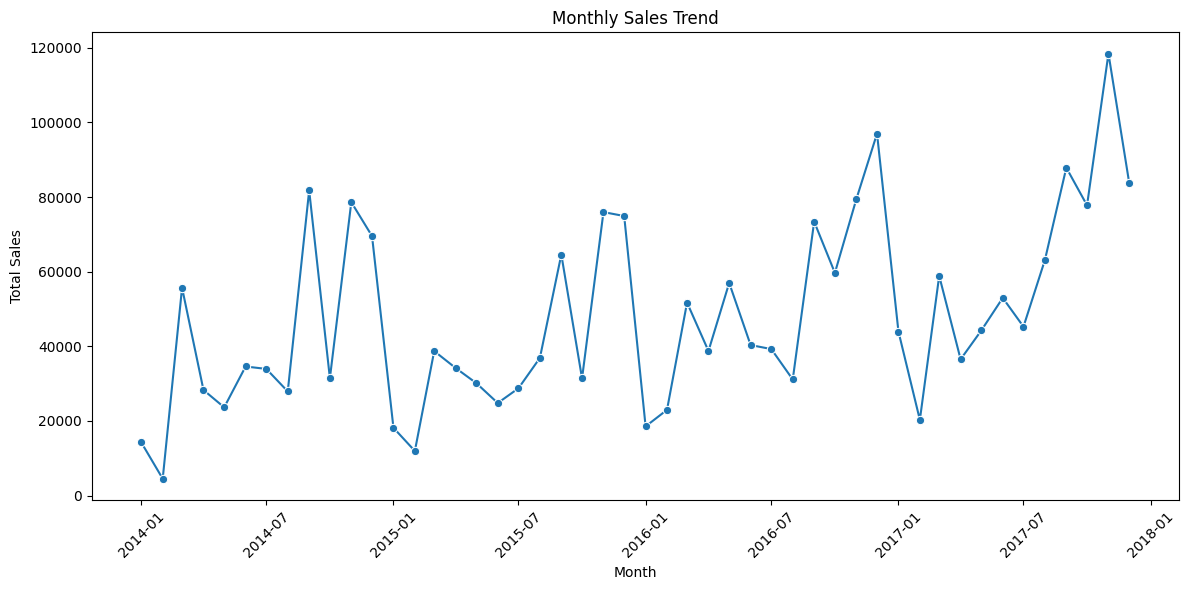

In [34]:
# Group sales by month
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Month'] = df['Order_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Convert to datetime (for plotting)
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\sanaz\AppData\Local\Temp\ipykernel_15700\3096949755.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='Sales', y='Category', palette='viridis')


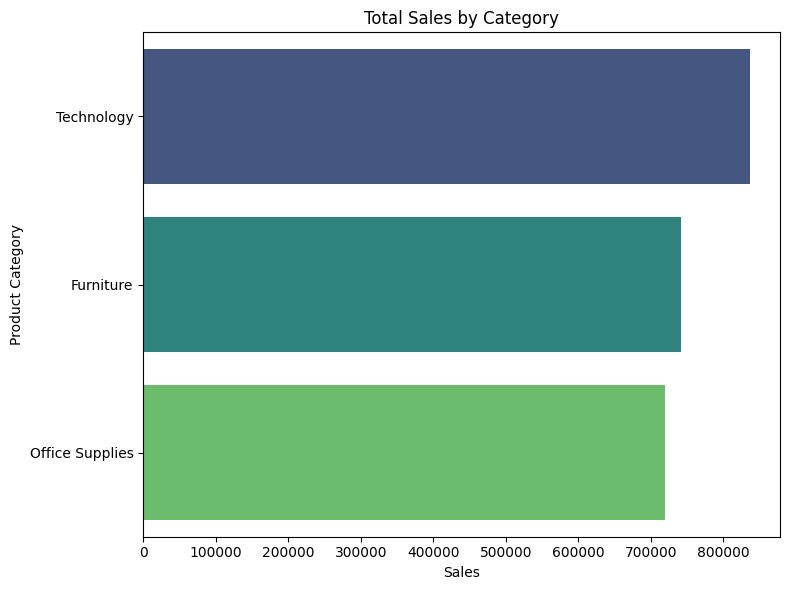

In [35]:
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=top_categories, x='Sales', y='Category', palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


C:\Users\sanaz\AppData\Local\Temp\ipykernel_15700\2341545409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Sales', y='Region', palette='mako')


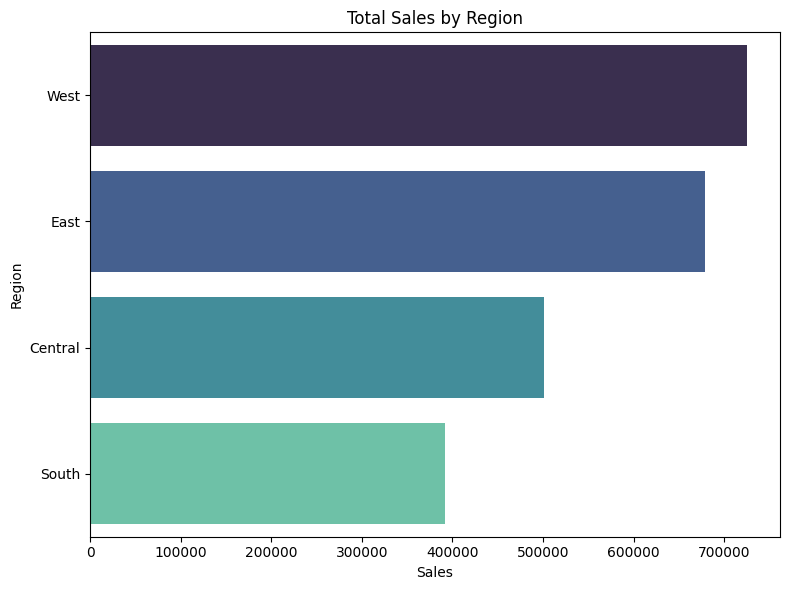

In [36]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=region_sales, x='Sales', y='Region', palette='mako')
plt.title('Total Sales by Region')
plt.tight_layout()
plt.show()


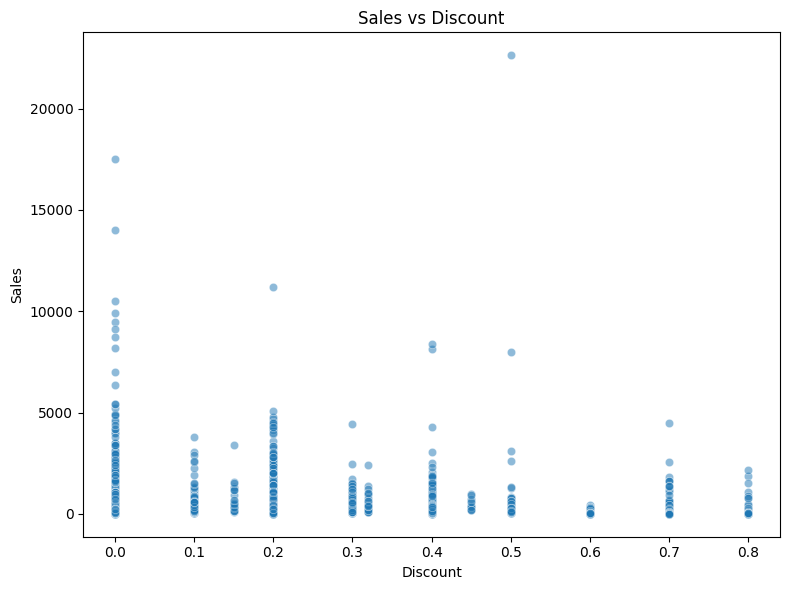

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Sales', alpha=0.5)
plt.title('Sales vs Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()
